In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Import dataset
df=pd.read_csv("loan_data_2007_2014_asli.csv", low_memory=False)

Business Understanding

In [4]:
# Business Understanding
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Melihat Jumlah Kolom
df.shape #(rows,column)

(466285, 75)

In [6]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Unnamed: 0          466285
id                  466285
member_id           466285
loan_amnt             1352
funded_amnt           1354
                     ...  
all_util                 0
total_rev_hi_lim     14612
inq_fi                   0
total_cu_tl              0
inq_last_12m             0
Length: 75, dtype: int64

In [7]:
# Drop Kolom Unnamed
df.drop(columns='Unnamed: 0',  inplace=True)

In [8]:
# Target Feature
data=df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [9]:
#Untuk melihat siapa yang menjadi GOOD / BAD Borrower dapat dilihat dari status loan
df.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Bad Borrower: 
1. Charged Off

Good Borrower:
1. Fully Paid
 
Untuk status Current, Late, Does not meet..., In Grace Period, dan Default belum bisa memberikan informasi yang solid untuk dimasukan ke salah satu borrower tersebut sehingga perlu dianalisis lebih lanjut.

Contoh: Late bukan berarti tidak membayar karena hanya telat tapi masih masuk dalam proses yang sedang terjadi.

In [10]:
data = df[df['loan_status'] !='Current']
data = df[df['loan_status'] !='Default']
data = df[df['loan_status'] !='Late (31-120 days)']
data = df[df['loan_status'] !='In Grace Period']
data = df[df['loan_status'] !='Late (16-30 days)']
data = df[df['loan_status'] !='Does not meet the credit policy. Status:Fully Paid']
data = df[df['loan_status'] !='Does not meet the credit policy. Status:Charged Off']
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


In [11]:
#Buat Target Feature
data['target'] = df['loan_status'].apply(lambda x: '1' if x == 'Charged Off' else '0')
# Apabila bernilai 1 maka Bad Borrower, apabila 0 maka Good Borrower

C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\1332577596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = df['loan_status'].apply(lambda x: '1' if x == 'Charged Off' else '0')


In [12]:
#Melihat jumlah 
data.target.value_counts()

target
0    423049
1     42475
Name: count, dtype: int64

Visualisasi Business Understanding

C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\3166054108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target_1'] = df['loan_status'].apply(lambda x: 'Bad' if x == 'Charged Off' else 'Good')


<function matplotlib.pyplot.show(close=None, block=None)>

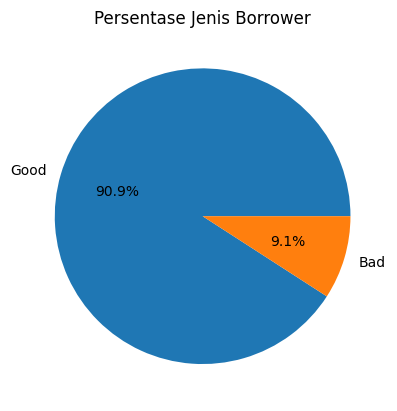

In [13]:
#Visualisasi Persentase Business
data['target_1'] = df['loan_status'].apply(lambda x: 'Bad' if x == 'Charged Off' else 'Good')
#Visualisasi jumlah bad atau good borrower terhadap keseluruhan
plt.pie (data.target_1.value_counts(), labels=data.target_1.unique(), autopct="%1.1f%%")
plt.title("Persentase Jenis Borrower")
plt.show

C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\664580616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['term']=df['term'].astype('object')
C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\664580616.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['term_integer']= data['term'].str.extract('(\d+)').astype(int)
C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\664580616.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

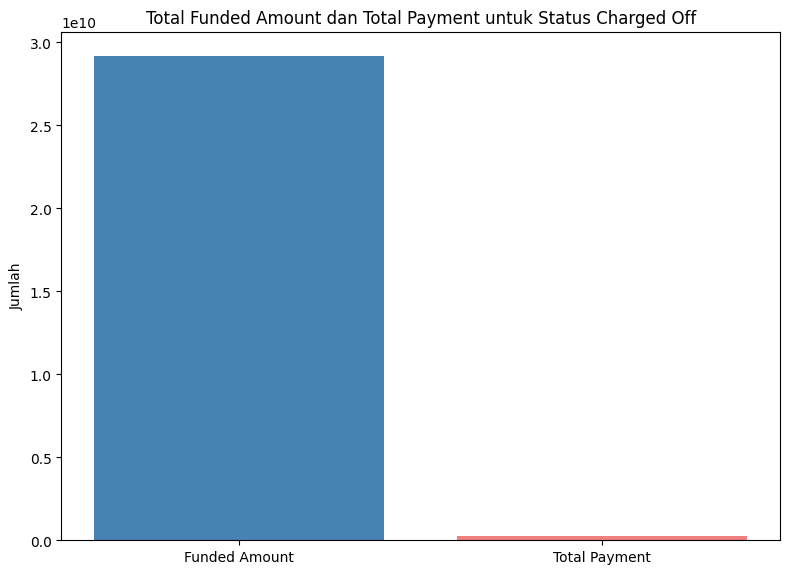

In [14]:
data['term']=df['term'].astype('object')
data['term_integer']= data['term'].str.extract('(\d+)').astype(int)
data['funded_amount_total']=data['funded_amnt']*data['term_integer']
nilai = data.iloc[0]['funded_amount_total']
nilai

data.groupby('target_1').agg({'funded_amount_total':'sum','total_pymnt':'sum'})

#Visualisasi hanya untuk status Bad
charged_off_data = data[data['target_1'] == 'Bad']
total_funded_amount = charged_off_data['funded_amount_total'].sum()
total_payment = charged_off_data['total_pymnt'].sum()
plt.figure(figsize=(8, 6))
plt.bar(['Funded Amount', 'Total Payment'], [total_funded_amount, total_payment], color=['steelblue', 'lightcoral'])
plt.ylabel('Jumlah')
plt.title('Total Funded Amount dan Total Payment untuk Status Charged Off')
plt.tight_layout()
plt.show()

In [15]:
differences= total_funded_amount-total_payment
differences

28906052356.13464

Berdasarkan visualisasi diatas, terdapat total 9,1% Bad Borrower. Dengan situasi tersebut dimana funded amount sudah dikalikan dengan jumlah bulan peminjaman maka perusahaan akan kehilangan sebesar 28,906,052,356 dari 9,1% Bad Borrower.

Data Cleaning

In [16]:
data_1=data.copy()

#Ubah tipe data object jadi categorical
for i in data_1.columns:
    if data_1[i].dtype == 'object':
        data_1[i]=data_1[i].astype('category')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465524 entries, 0 to 466284
Data columns (total 78 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   id                           465524 non-null  int64   
 1   member_id                    465524 non-null  int64   
 2   loan_amnt                    465524 non-null  int64   
 3   funded_amnt                  465524 non-null  int64   
 4   funded_amnt_inv              465524 non-null  float64 
 5   term                         465524 non-null  category
 6   int_rate                     465524 non-null  float64 
 7   installment                  465524 non-null  float64 
 8   grade                        465524 non-null  category
 9   sub_grade                    465524 non-null  category
 10  emp_title                    437986 non-null  category
 11  emp_length                   444531 non-null  category
 12  home_ownership               465524 non-null  cat

In [17]:
# Melihat kolom null
kolom_dengan_null = data_1.columns[data_1.isnull().any()].tolist()
print(kolom_dengan_null)

jumlah_null=data_1.isnull().sum()
print(jumlah_null)

#Melihat nilai duplikat
duplicated=data_1['member_id'].duplicated()
print(duplicated)

data_1_cleaned=data_1.dropna(how='all',axis=1)
data_1_cleaned

['emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util', 'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m']
id                          0
member_id                   0
loan_amnt                   0
funded_amnt                 0
funded_amnt_inv             0
                        ...  
inq_last_12m           465524
target                      0
target_1                    0
term_integer                0
funded_amount_total         0
Lengt

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,target,target_1,term_integer,funded_amount_total
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Good,36,180000
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1,INDIVIDUAL,0.0,NaN,NaN,NaN,1,Bad,60,150000
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Good,36,86400
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Good,36,360000
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,1,INDIVIDUAL,0.0,NaN,NaN,NaN,0,Good,60,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,...,1,INDIVIDUAL,0.0,0.0,294998.0,29900.0,0,Good,60,1104000
466281,9684700,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,...,1,INDIVIDUAL,0.0,0.0,221830.0,39400.0,1,Bad,60,1320000
466282,9584776,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,...,1,INDIVIDUAL,0.0,0.0,73598.0,13100.0,0,Good,60,1242000
466283,9604874,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,...,1,INDIVIDUAL,0.0,0.0,591610.0,53100.0,0,Good,36,72000


In [18]:
#Nilai null pada data
data_1_cleaned.nunique()

id                     465524
member_id              465524
loan_amnt                1351
funded_amnt              1353
funded_amnt_inv          9482
                        ...  
total_rev_hi_lim        14612
target                      2
target_1                    2
term_integer                2
funded_amount_total      2322
Length: 61, dtype: int64

Fitur emp_title, issue_d, url, desc, title, zip_code, add_state, earliest_cr_line, last_pymnt_d, next_pymnt_d, last_credit_pull_d didrop karena memiliki nilai unik terlalu banyak

Fitur application_type di drop krn hanya memiliki nilai value 1 

In [19]:
#Drop kolom dengan nilai unique yang banyak
data_1_cleaned.drop(['emp_title', 'issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], axis=1, inplace=True)

data_1_cleaned.shape

#Drop kolom dengan nilai unique yang banyak
data_1_cleaned.drop(['id', 'member_id', 'funded_amnt_inv', 'int_rate', 'installment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                     'total_rec_late_fee', 'tot_cur_bal', 'total_rev_hi_lim', 'verification_status','mths_since_last_delinq','mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 
                     'revol_util', 'total_acc','out_prncp', 'out_prncp_inv', 'recoveries','collection_recovery_fee','last_pymnt_amnt', 'tot_coll_amt', 'mths_since_last_major_derog', 'policy_code'], 
                     axis=1, inplace=True)

data_1_cleaned.nunique()
data_2_cleaned=data_1_cleaned.copy()
data_2_new=data_2_cleaned.dropna().reset_index(drop=True)
data_2_new

C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\2327214988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_cleaned.drop(['emp_title', 'issue_d', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'earliest_cr_line','last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type'], axis=1, inplace=True)
C:\Users\Nathanael JeshuaPaat\AppData\Local\Temp\ipykernel_18008\2327214988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1_cleaned.drop(['id', 'member_id', 'funded_amnt_inv', 'int_rate', 'installment', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',


,loan_amnt,funded_amnt,term,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,pymnt_plan,...,delinq_2yrs,inq_last_6mths,initial_list_status,total_pymnt,collections_12_mths_ex_med,acc_now_delinq,target,target_1,term_integer,funded_amount_total
0,5000,5000,36 months,B,B2,10+ years,RENT,24000.0,Fully Paid,n,...,0.0,1.0,f,5861.071414,0.0,0.0,0,Good,36,180000
1,2500,2500,60 months,C,C4,< 1 year,RENT,30000.0,Charged Off,n,...,0.0,5.0,f,1008.710000,0.0,0.0,1,Bad,60,150000
2,2400,2400,36 months,C,C5,10+ years,RENT,12252.0,Fully Paid,n,...,0.0,2.0,f,3003.653644,0.0,0.0,0,Good,36,86400
3,10000,10000,36 months,C,C1,10+ years,RENT,49200.0,Fully Paid,n,...,0.0,1.0,f,12226.302210,0.0,0.0,0,Good,36,360000
4,3000,3000,60 months,B,B5,1 year,RENT,80000.0,Current,n,...,0.0,0.0,f,3242.170000,0.0,0.0,0,Good,60,180000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444403,18400,18400,60 months,C,C2,4 years,MORTGAGE,110000.0,Current,n,...,0.0,2.0,w,10383.360000,0.0,0.0,0,Good,60,1104000
444404,22000,22000,60 months,D,D5,10+ years,MORTGAGE,78000.0,Charged Off,n,...,0.0,5.0,f,4677.920000,0.0,0.0,1,Bad,60,1320000
444405,20700,20700,60 months,D,D1,7 years,MORTGAGE,46000.0,Current,n,...,0.0,2.0,f,12343.980000,0.0,0.0,0,Good,60,1242000
444406,2000,2000,36 months,A,A4,3 years,OWN,83000.0,Fully Paid,n,...,3.0,1.0,w,2126.579838,0.0,0.0,0,Good,36,72000


In [20]:
# Mencari kolom dengan nilai null
kolom_null = data_2_new.columns[data_2_new.isnull().any()].tolist()

# Menampilkan nama kolom yang memiliki nilai null
print("Kolom dengan nilai null:")
for kolom in kolom_null:
    print(kolom)

Kolom dengan nilai null:


In [21]:
data_2_new.info()
data_new=data_2_new.copy()

data_new['target'] = data_new['target'].astype('category').cat.codes
data_new.info()

data_new.drop(['loan_amnt','funded_amnt','sub_grade', 'total_pymnt', 'collections_12_mths_ex_med', 'acc_now_delinq'], axis=1, inplace=True)
data_new.info()
data_new_1=data_new.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444408 entries, 0 to 444407
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   loan_amnt                   444408 non-null  int64   
 1   funded_amnt                 444408 non-null  int64   
 2   term                        444408 non-null  category
 3   grade                       444408 non-null  category
 4   sub_grade                   444408 non-null  category
 5   emp_length                  444408 non-null  category
 6   home_ownership              444408 non-null  category
 7   annual_inc                  444408 non-null  float64 
 8   loan_status                 444408 non-null  category
 9   pymnt_plan                  444408 non-null  category
 10  purpose                     444408 non-null  category
 11  dti                         444408 non-null  float64 
 12  delinq_2yrs                 444408 non-null  float64 
 13 

Exploratory Data Analysis

jumlah =  7
nums =  ['annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'target', 'term_integer', 'funded_amount_total']
jumlah =  9
cats =  ['term', 'grade', 'emp_length', 'home_ownership', 'loan_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'target_1']


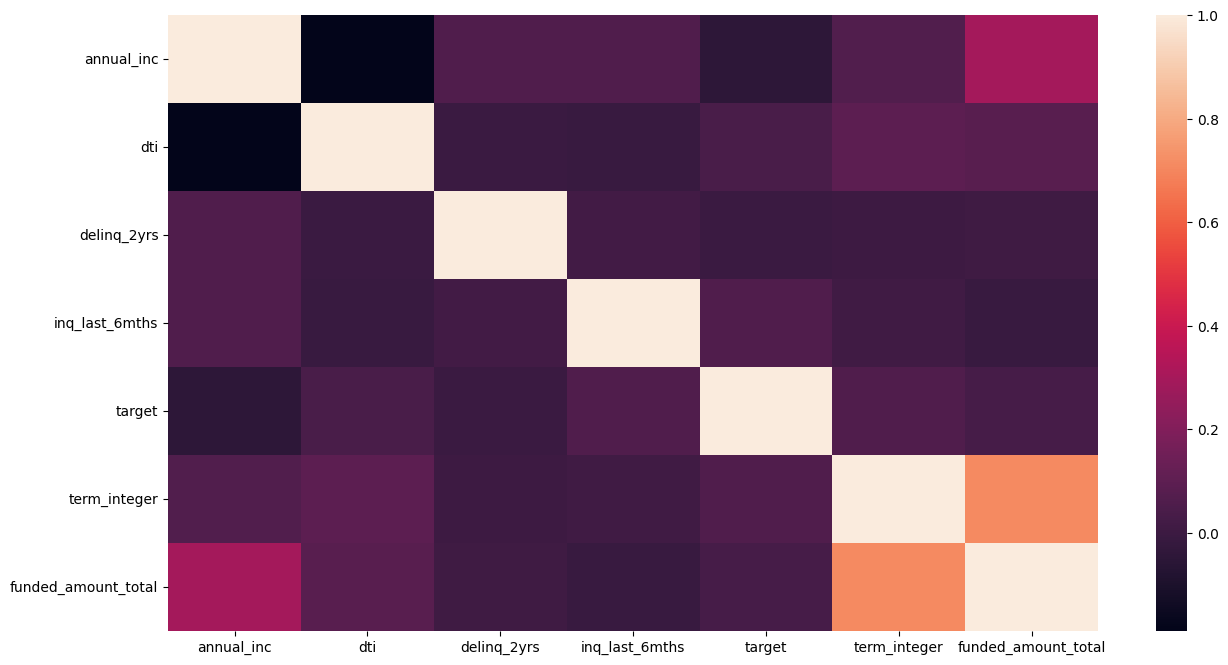

In [22]:
# Analisa pada Numerical Feature
nums_2 = []
cats_2 = []
for i in data_new_1.columns:
  if data_new_1[i].dtype == 'category':
    cats_2.append(i)
  else:
    nums_2.append(i)
print('jumlah = ',len(nums_2))
print('nums = ',nums_2)
print('jumlah = ',len(cats_2))
print('cats = ',cats_2)

plt.figure(figsize=(15,8))
sns.heatmap(data_new_1[nums_2].corr(),fmt='2.f')
plt.show()

Dapat dilihat bahwa dari numerical feature tidak ada yang terlalu berpengaruh

C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


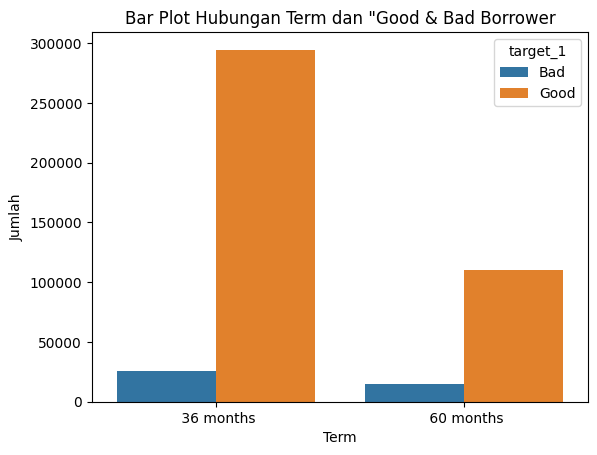

C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


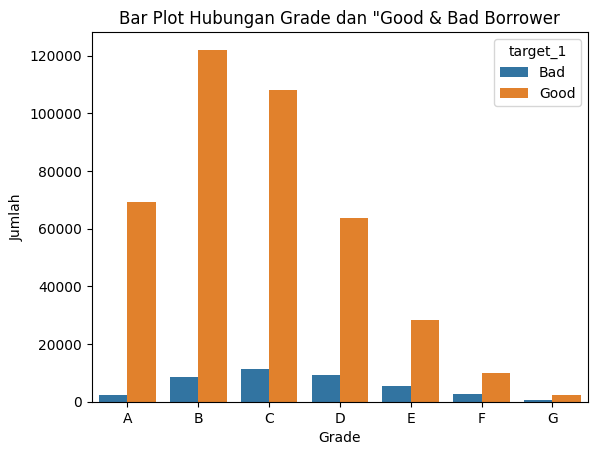

C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


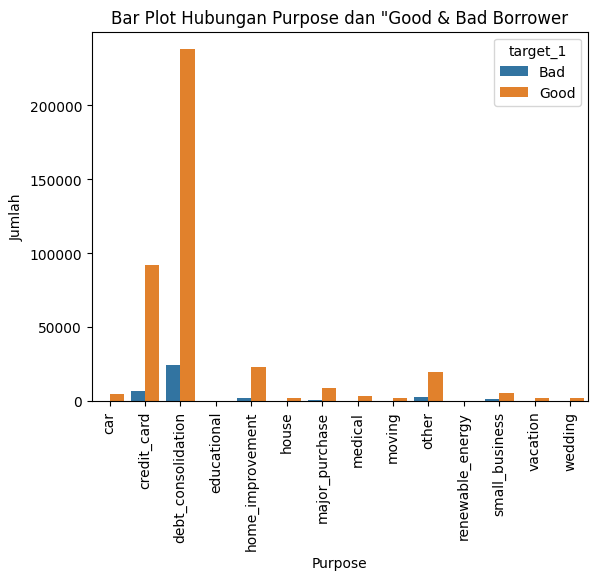

C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


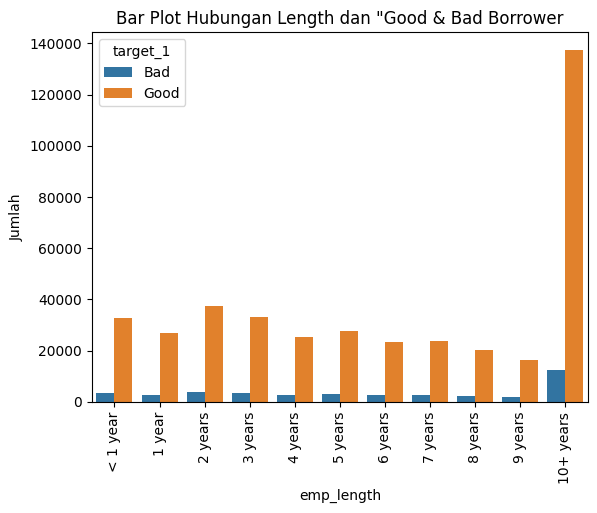

C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Nathanael JeshuaPaat\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


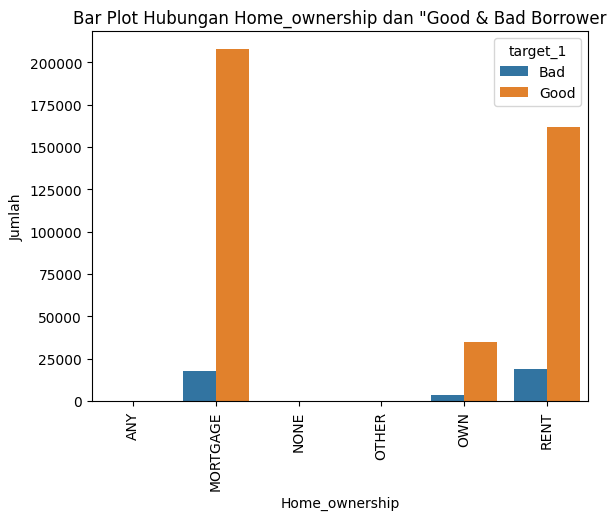

In [23]:
# Analisa pada Categorical Features
sns.countplot(data=data_new_1, x='term', hue='target_1')
plt.xlabel('Term')
plt.ylabel('Jumlah')
plt.title('Bar Plot Hubungan Term dan "Good & Bad Borrower')
plt.show()

sns.countplot(data=data_new_1, x='grade', hue='target_1')
plt.xlabel('Grade')
plt.ylabel('Jumlah')
plt.title('Bar Plot Hubungan Grade dan "Good & Bad Borrower')
plt.show()

sns.countplot(data=data_new_1, x='purpose', hue='target_1')
plt.xticks(rotation=90)
plt.xlabel('Purpose')
plt.ylabel('Jumlah')
plt.title('Bar Plot Hubungan Purpose dan "Good & Bad Borrower')
plt.show()

length = ['< 1 year','1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']
data_new_1['emp_length'] = pd.Categorical(data_new_1['emp_length'], categories=length, ordered=True)
sns.countplot(data=data_new_1, x='emp_length', hue='target_1')
plt.xticks(rotation=90)
plt.xlabel('emp_length')
plt.ylabel('Jumlah')
plt.title('Bar Plot Hubungan Length dan "Good & Bad Borrower')
plt.show()

sns.countplot(data=data_new_1, x='home_ownership', hue='target_1')
plt.xticks(rotation=90)
plt.xlabel('Home_ownership')
plt.ylabel('Jumlah')
plt.title('Bar Plot Hubungan Home_ownership dan "Good & Bad Borrower')
plt.show()

Berdasarkan categorical feature, peminjam yang diklasifikasikan Bad Borrower mayoritas memiliki term 36 bulan , grade C, purpose Debt Consolidation, emp length dengan diatas 10 tahun, dan home ownership rent

Preprocessing dan Modelling

In [24]:
#Random Forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

data_final=pd.read_csv('datatrain.csv')
encoder=LabelEncoder()
data_final['term_Encoded'] = encoder.fit_transform(data_final['term'])
data_final['home_ownership_Encoded'] = encoder.fit_transform(data_final['home_ownership'])
data_final['grade_Encoded'] = encoder.fit_transform(data_final['grade'])
data_final['purpose_Encoded'] = encoder.fit_transform(data_final['purpose'])
data_final['emp_length_Encoded'] = encoder.fit_transform(data_final['emp_length'])
features = ["home_ownership_Encoded", "purpose_Encoded", "emp_length_Encoded", "term_Encoded", "grade_Encoded"]
output='target'
X_train, X_test, y_train, y_test = train_test_split(data_final[features], data_final[output], test_size=0.3, random_state=84)
y_train.value_counts(normalize=True)
y_test.value_counts(normalize=True)
model = RandomForestClassifier(n_estimators=100,
                                random_state=84,
                               )

# Latih model dengan data pelatihan
model.fit(X_train, y_train)

# Prediksi keterlambatan untuk data validasi
y_pred = model.predict(X_test)

# Evaluasi model (misalnya, dengan menghitung akurasi)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

y_pred_prob = model.predict_proba(X_test)[:, 1]
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'AUC-ROC Score: {auc_score}')

Accuracy: 0.91
AUC-ROC Score: 0.6334160538407435


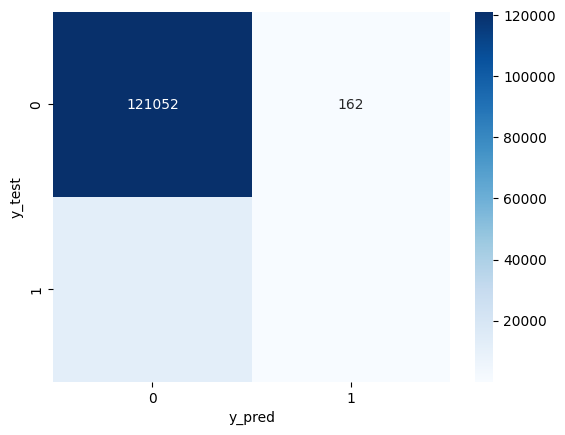

In [25]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()